In [10]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.sans-serif']=['simhei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
data = pd.read_csv('../data/xigua3.0.csv')
data

,编号,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是
5,6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,是
6,7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,是
7,8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,是
8,9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,否
9,10,青绿,硬挺,清脆,清晰,平坦,软粘,0.243,0.267,否


In [4]:
data = data[['密度','含糖率','好瓜']]
data['好瓜'] = data['好瓜'].replace({"是":1, "否":0})
data

C:\Users\wangy\AppData\Local\Temp\ipykernel_368\2683831932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['好瓜'] = data['好瓜'].replace({"是":1, "否":0})


,密度,含糖率,好瓜
0,0.697,0.460,1
1,0.774,0.376,1
2,0.634,0.264,1
3,0.608,0.318,1
4,0.556,0.215,1
5,0.403,0.237,1
6,0.481,0.149,1
7,0.437,0.211,1
8,0.666,0.091,0
9,0.243,0.267,0


In [5]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(data[['密度','含糖率']], data['好瓜'])
model.score(data[['密度','含糖率']], data['好瓜'])

1.0

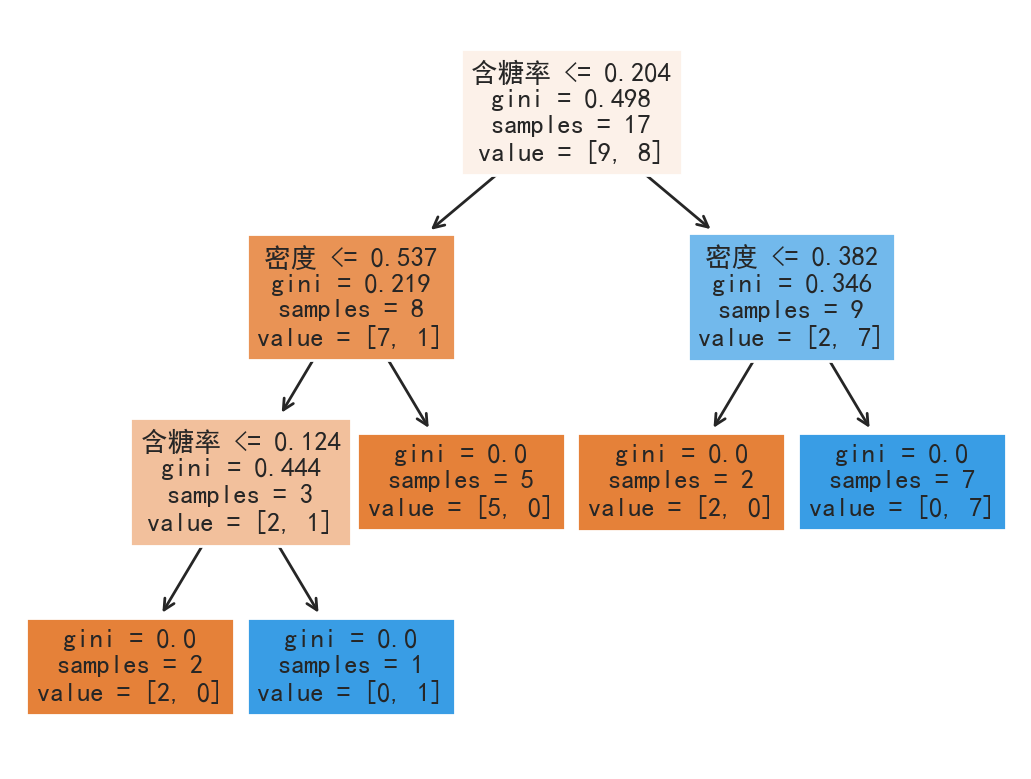

In [12]:
from sklearn.tree import plot_tree
plt.rcParams['figure.dpi']=200
plot_tree(model,feature_names=['密度','含糖率'],
          filled=True)
plt.show()

In [13]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)
x, y = np.meshgrid(x,y)
disp_input = np.vstack((x.flatten(), y.flatten())).T
disp_predict = model.predict(disp_input)
disp_predict

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

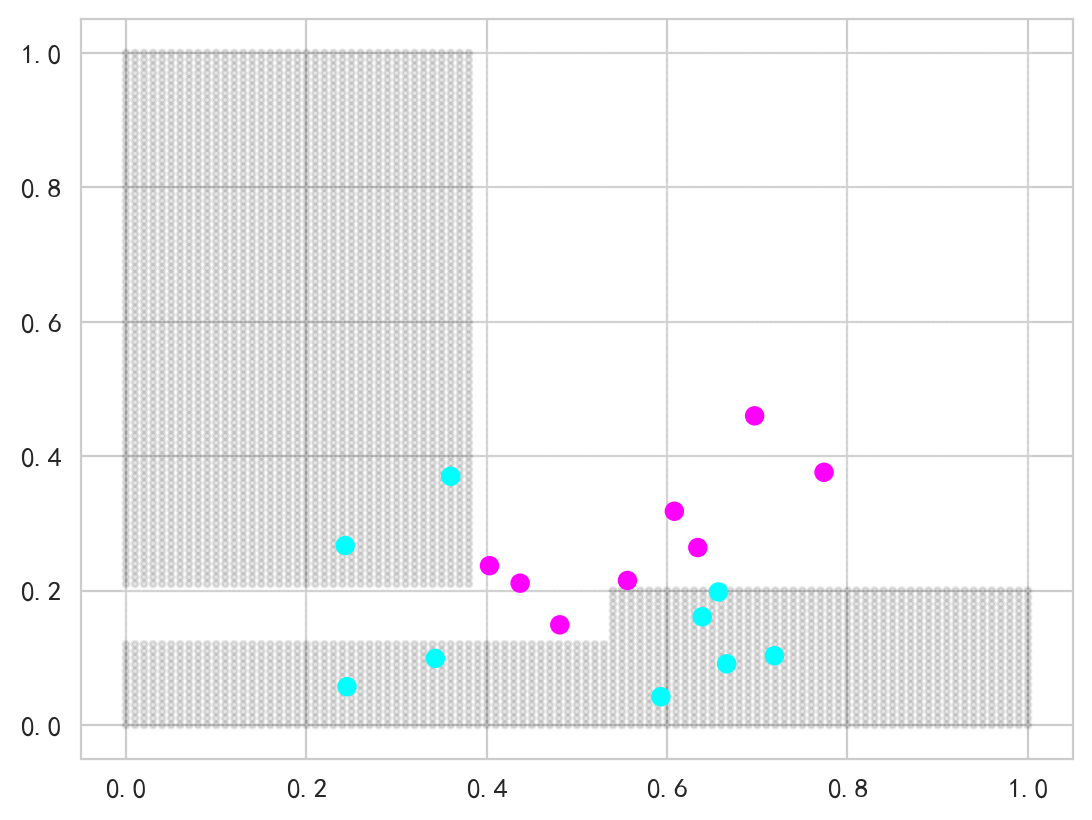

In [19]:
plt.figure(dpi=200)
plt.scatter(disp_input[:,0], disp_input[:,1], c=disp_predict, cmap='gray', alpha=0.1, s=5)
plt.scatter(data['密度'],data['含糖率'], c=data['好瓜'], cmap='cool')
plt.show()

0.9411764705882353


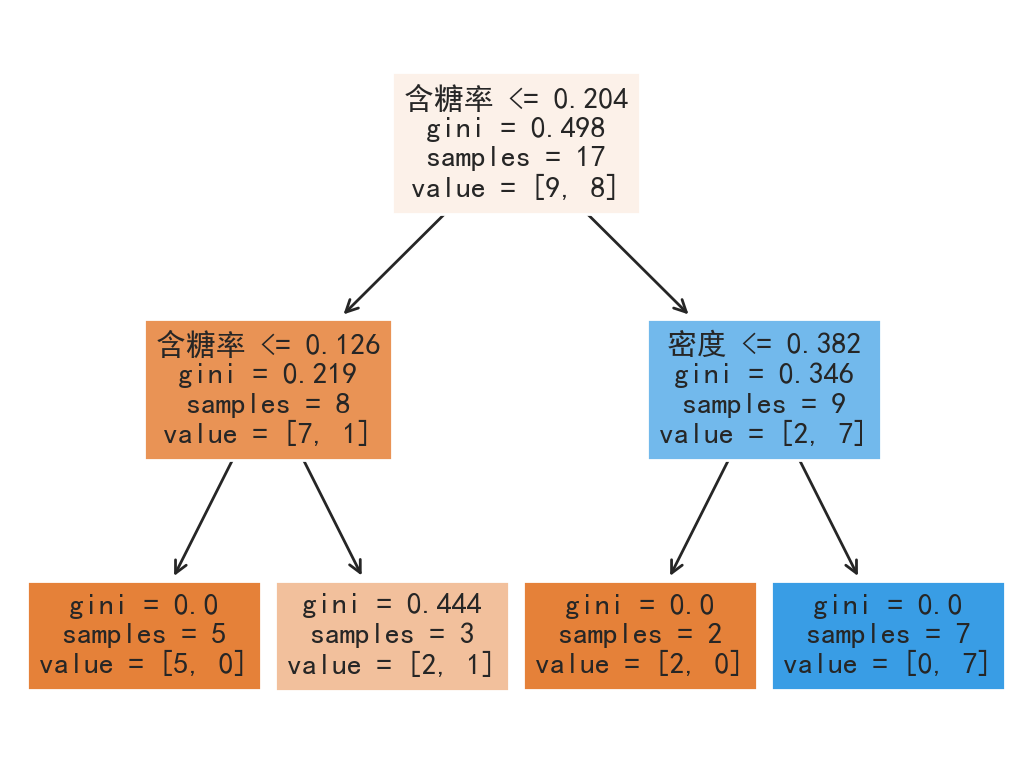

In [43]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2)
model.fit(data[['密度','含糖率']], data['好瓜'])
print(model.score(data[['密度','含糖率']], data['好瓜']))
from sklearn.tree import plot_tree
plt.rcParams['figure.dpi']=200
plot_tree(model,feature_names=['密度','含糖率'],
          filled=True)
plt.show()

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


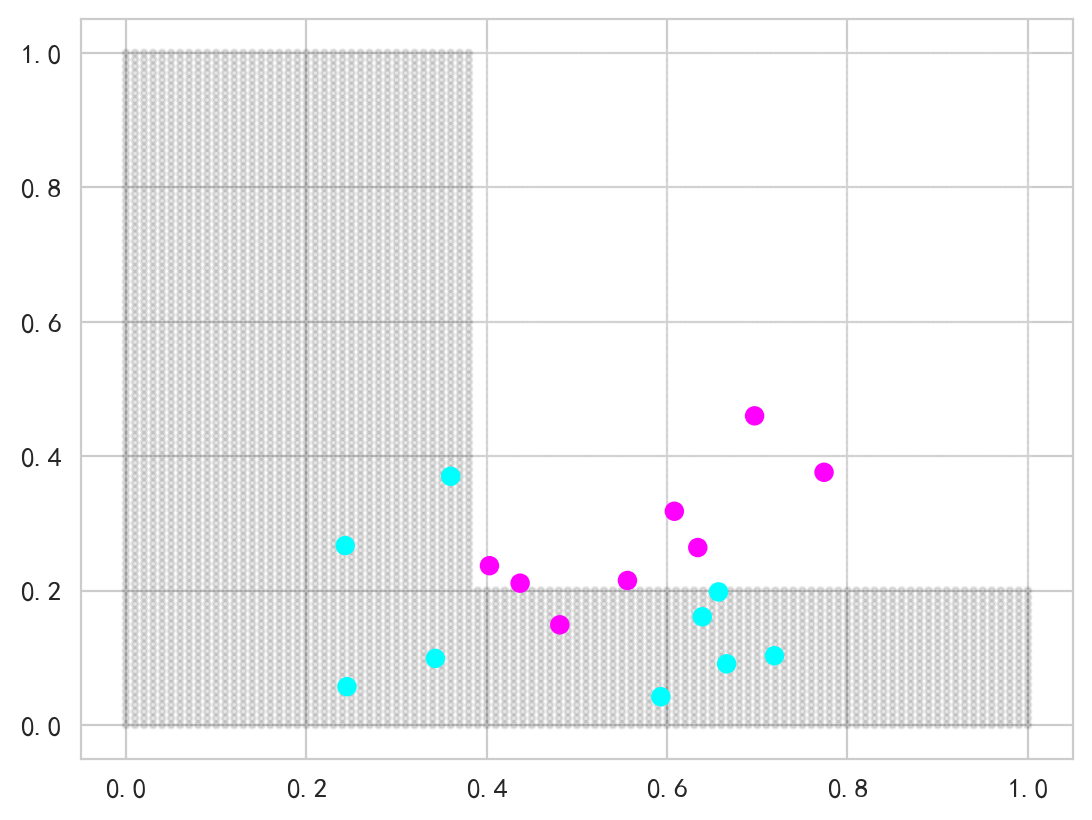

In [22]:
plt.figure(dpi=200)
disp_predict = model.predict(disp_input)
plt.scatter(disp_input[:,0], disp_input[:,1], c=disp_predict, cmap='gray', alpha=0.1, s=5)
plt.scatter(data['密度'],data['含糖率'], c=data['好瓜'], cmap='cool')
plt.show()

1.0


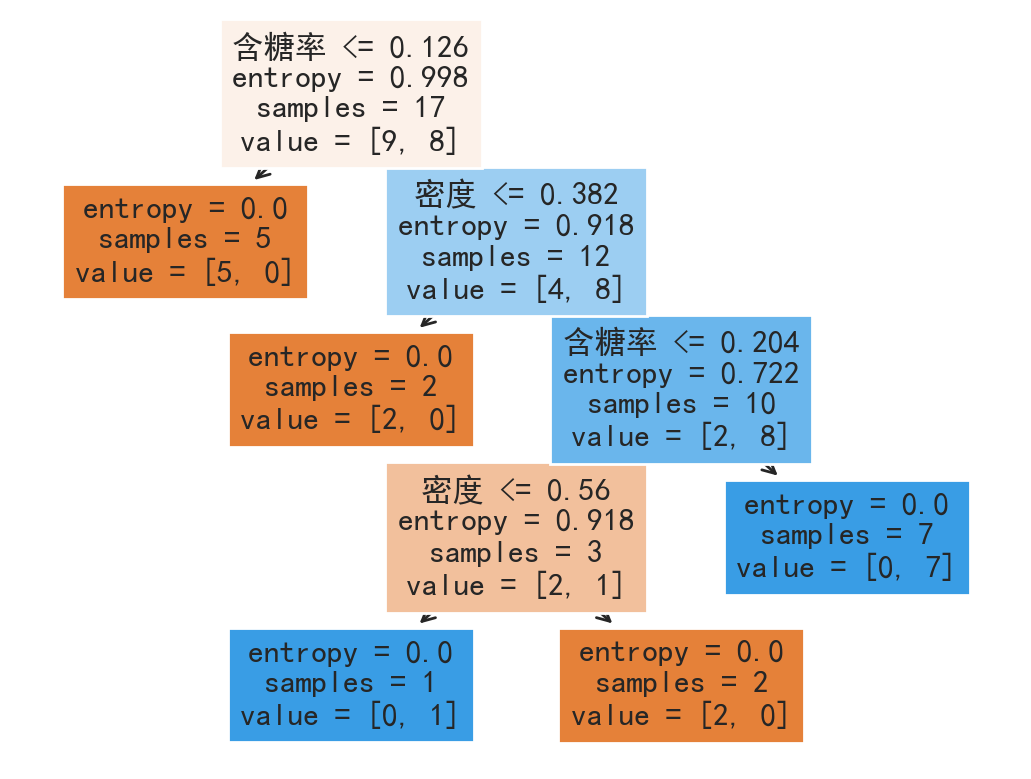

In [55]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
model.fit(data[['密度','含糖率']], data['好瓜'])
print(model.score(data[['密度','含糖率']], data['好瓜']))
from sklearn.tree import plot_tree
plt.rcParams['figure.dpi']=200
plot_tree(model,feature_names=['密度','含糖率'],
          filled=True)
plt.show()

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


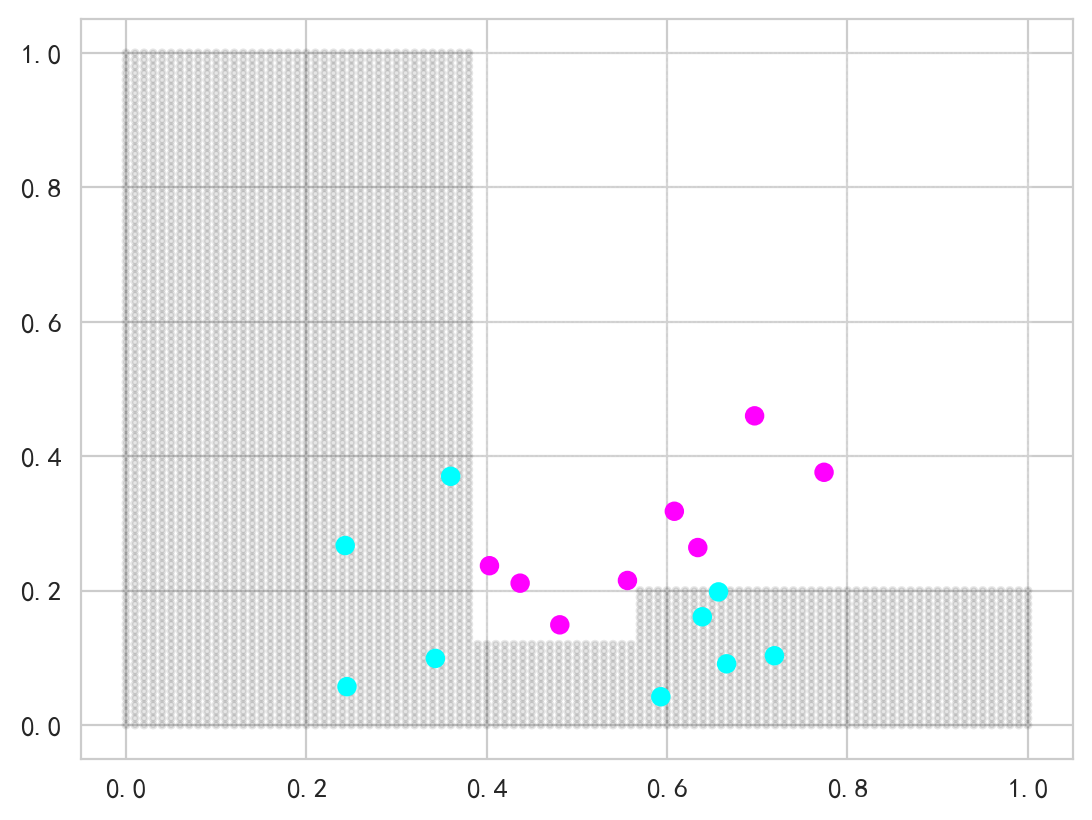

In [56]:
plt.figure(dpi=200)
disp_predict = model.predict(disp_input)
plt.scatter(disp_input[:,0], disp_input[:,1], c=disp_predict, cmap='gray', alpha=0.1, s=5)
plt.scatter(data['密度'],data['含糖率'], c=data['好瓜'], cmap='cool')
plt.show()

1.0


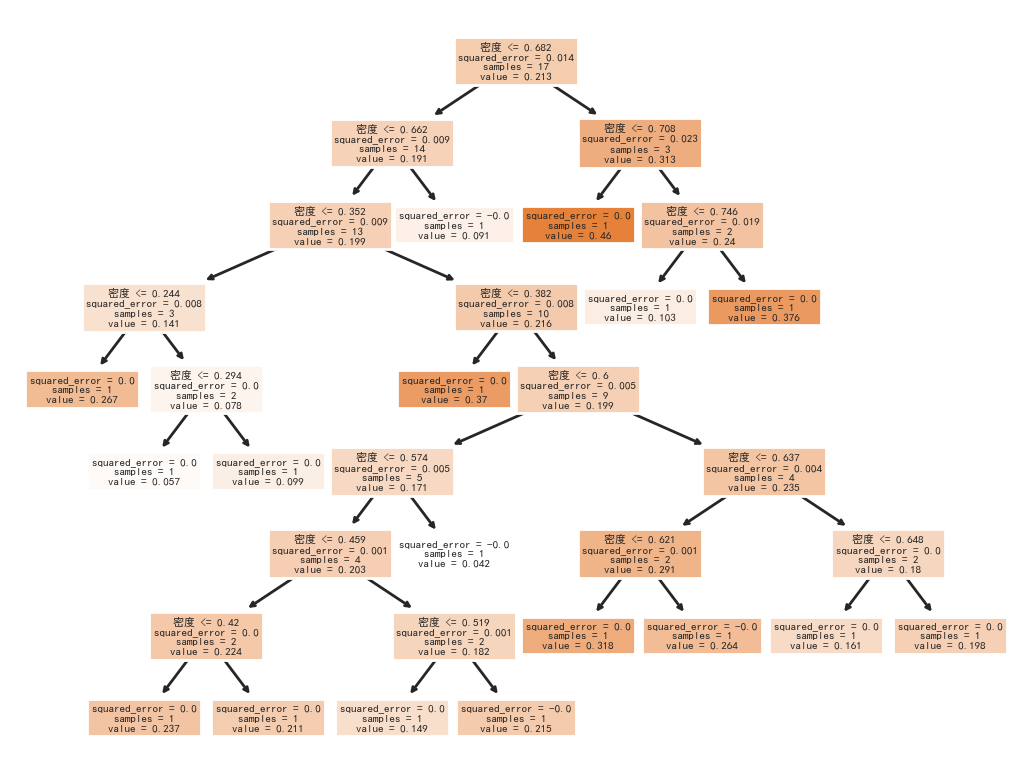

In [58]:
# 回归
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='squared_error')
model.fit(data[['密度']], data['含糖率'])
print(model.score(data[['密度']], data['含糖率']))
from sklearn.tree import plot_tree
plt.rcParams['figure.dpi']=200
plot_tree(model,feature_names=['密度','含糖率'],
          filled=True)
plt.show()

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


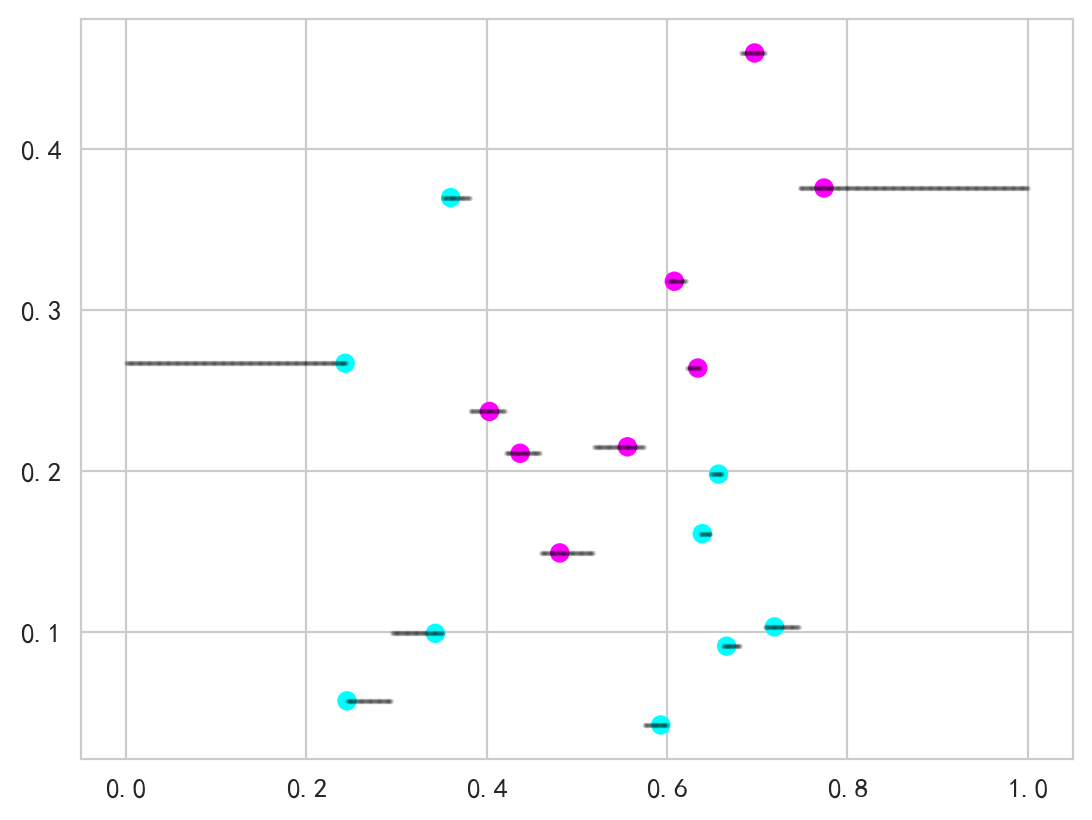

In [61]:
x_line = np.linspace(0, 1.0, 1001).reshape((1001,1))
y_line = model.predict(x_line)
plt.figure(dpi=200)
plt.scatter(data['密度'],data['含糖率'], c=data['好瓜'], cmap='cool')
plt.scatter(x_line, y_line, c='black', alpha=0.1, s=1)
plt.show()

0.5664047250290747


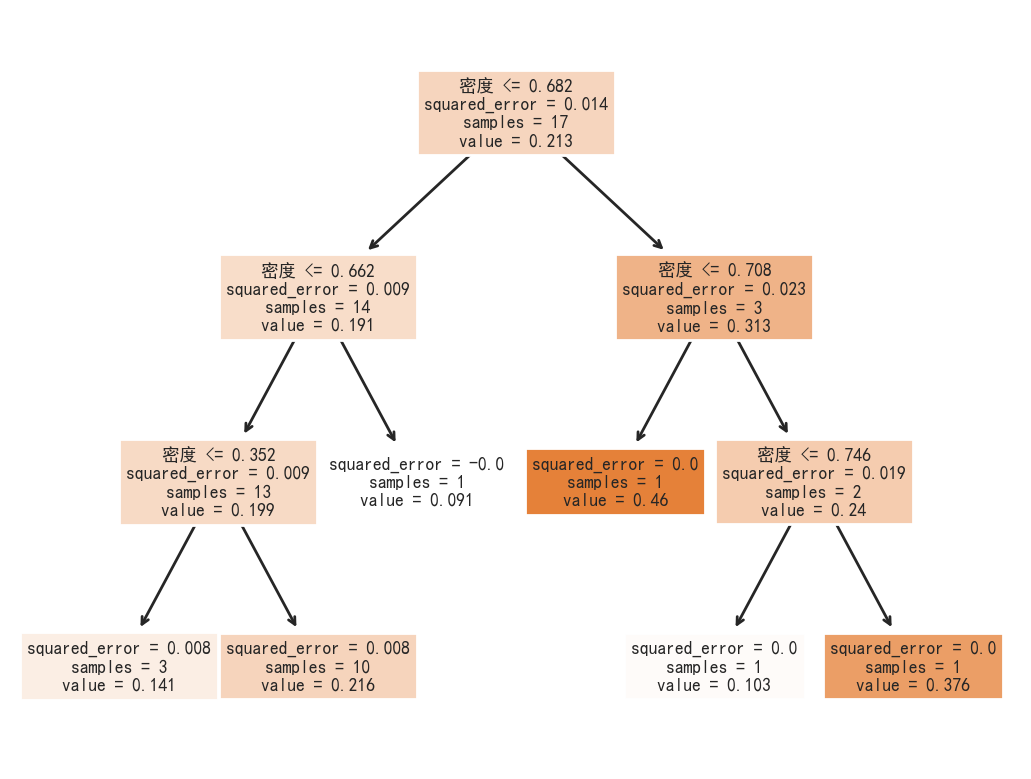

In [62]:
# 回归
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='squared_error',
                              max_depth=3)
model.fit(data[['密度']], data['含糖率'])
print(model.score(data[['密度']], data['含糖率']))
from sklearn.tree import plot_tree
plt.rcParams['figure.dpi']=200
plot_tree(model,feature_names=['密度','含糖率'],
          filled=True)
plt.show()

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


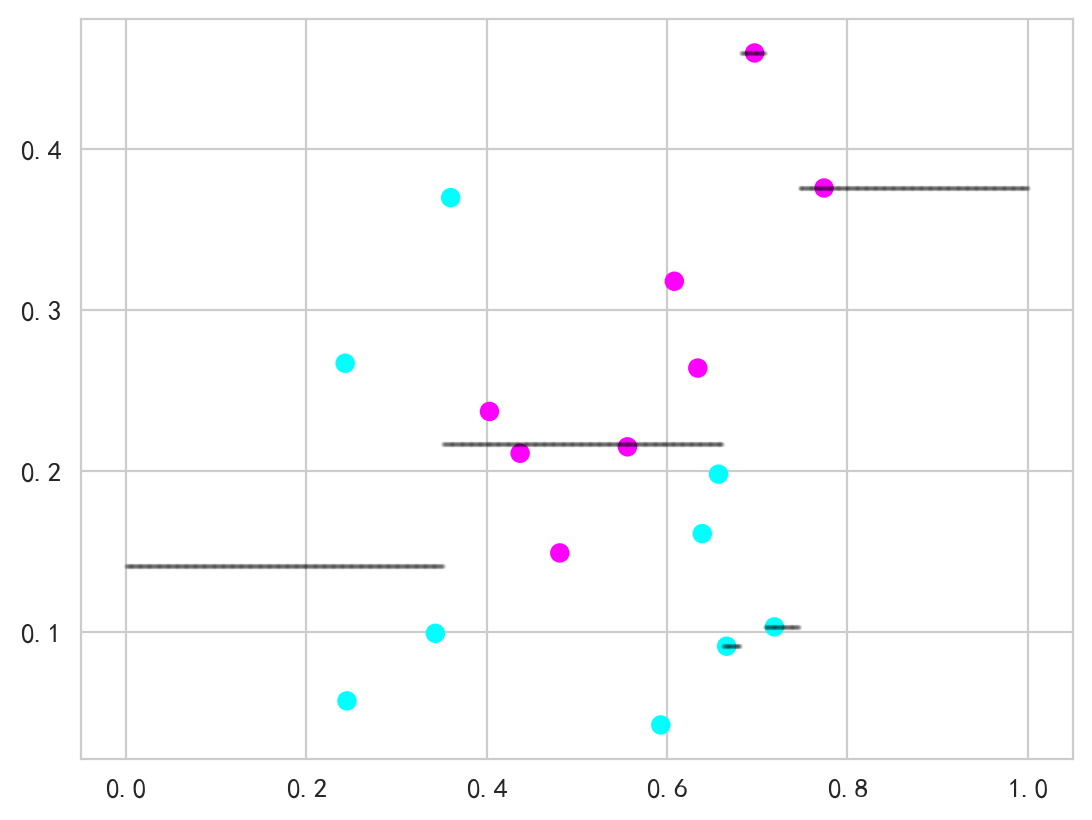

In [63]:
x_line = np.linspace(0, 1.0, 1001).reshape((1001,1))
y_line = model.predict(x_line)
plt.figure(dpi=200)
plt.scatter(data['密度'],data['含糖率'], c=data['好瓜'], cmap='cool')
plt.scatter(x_line, y_line, c='black', alpha=0.1, s=1)
plt.show()